<a href="https://colab.research.google.com/github/snfruby/CS114.K21/blob/master/Seam_Carving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in ubyte_scalars


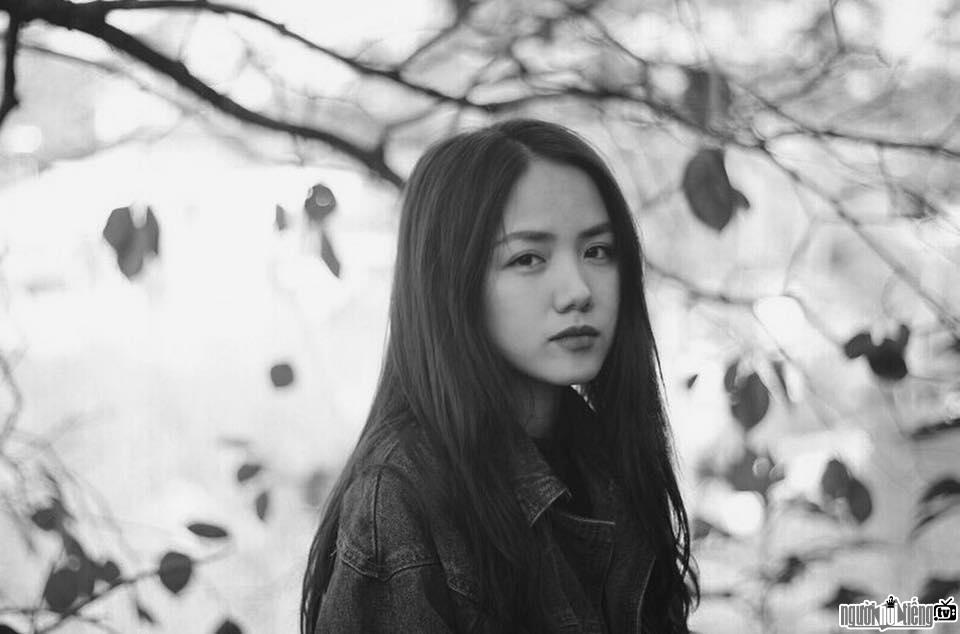

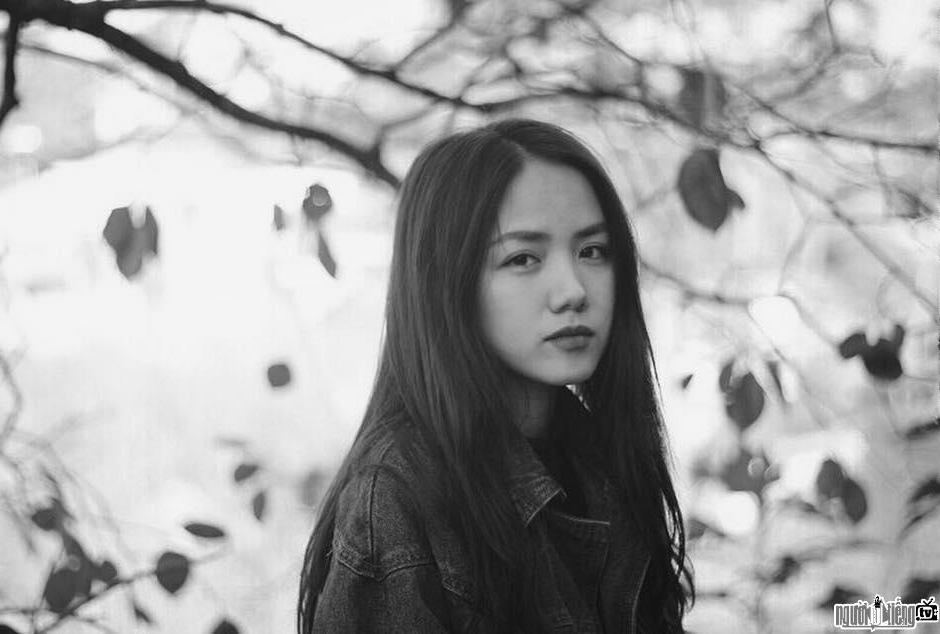

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
# Buoc 1: doc anh
img = cv2.imread('/content/bbcu.jpg', 0)


def ComputeImageGradient(img):
    # Buoc 2: tinh dao ham theo truc x
    dx = img[:,1:].astype(np.float) - img[:,:-1].astype(np.float)
    # Buoc 3: tinh dao ham theo truc y
    dy = img[1:,:].astype(np.float) - img[:-1,:].astype(np.float)
    # Buoc 4: tinh image gradient
    G = np.sqrt(dx[:-1,:]**2 + dy[:,:-1]**2)
    return G

# BUOC 6: seam carving
D = 20

def minimum_seam(img):
  matrix_img = np.zeros((img.shape[0]+1,img.shape[1]+1)) # tạo ra một ma trận mới chứa ma trận bức hình tuy nhiên tăng thêm 1 cột và 1 hàng chứa giá trị 0 để sau khi Gradient xong ko bị mất cột/dòng
  matrix_img[1:,:-1]=img
  energy_map = ComputeImageGradient(matrix_img)
  energy_map = energy_map.astype(np.uint8)
  M = energy_map.copy()
  backtrack = np.zeros(img.shape, dtype=np.int)
  c=energy_map.shape[1]
  r=energy_map.shape[0]
  for i in range(1, r):
          for j in range(0, c):
             
              if j == 0:
                  idx = np.argmin(M[i - 1, j:j + 2])
                  backtrack[i, j] = idx + j
                  min_energy = M[i - 1, idx + j]
              else:
                  idx = np.argmin(M[i - 1, j - 1:j + 2])
                  backtrack[i, j] = idx + j - 1
                  min_energy = M[i - 1, idx + j - 1]
              M[i, j] += min_energy       
  return M,backtrack      

# hàm carve_column : loại bỏ đường seam đã tính toán sau đó reshape lại hình
def carve_column(img):
    c=img.shape[1]
    r=img.shape[0]
    M, backtrack = minimum_seam(img)
    mask = np.ones((r, c), dtype=np.bool)

    j = np.argmin(M[-1])

    for i in reversed(range(r)):

        mask[i, j] = False
        j = backtrack[i, j]

    img = img[mask].reshape((r, c - 1))

    return img
img_sc = img

# thực hiện Seam Carving 20 lần
for i in range(D):
 img_sc = carve_column(img_sc)
# Buoc 5: hien thi anh de kiem tra xe doc dung ko
# Hien thi anh gradient
cv2_imshow(img)
cv2_imshow(img_sc)

